# Title of notebook

Brief 1-2 sentence description of notebook.

In [14]:
# Imports of all used packages and libraries
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns

In [3]:
import spikeinterface.extractors as se
import spikeinterface.preprocessing as sp

## Inputs & Data

Explanation of each input and where it comes from.

In [8]:
# Inputs and Required data loading
# input varaible names are in all caps snake case
# Whenever an input changes or is used for processing 
# the vairables are all lower in snake case
OUTPUT_DIR = r"./proc/" # where data is saved should always be shown in the inputs
os.makedirs(OUTPUT_DIR, exist_ok=True)

In [9]:
CHANNEL_MAPPING_DF = pd.read_excel("../../data/channel_mapping.xlsx")
TONE_TIMESTAMP_DF = pd.read_excel("../../data/rce_tone_timestamp.xlsx", index_col=0)
channel_map_and_all_trials_df = pd.read_pickle("./proc/full_baseline_and_trial_lfp_traces.pkl")

In [42]:
TIME_HALFBANDWIDTH_PRODUCT = 2
TIME_WINDOW_DURATION = 1
TIME_WINDOW_STEP = 0.5
RESAMPLE_RATE=1000
LFP_SAMPLING_RATE=1000
EPHYS_SAMPLING_RATE=20000

In [11]:
TRIAL_OR_BASELINE_TO_STYLE = {'baseline': "--", "trial": "-"}

In [12]:
BASELINE_OUTCOME_TO_COLOR = {'lose': "red",
 'omission': "orange",
 'rewarded': "green",
 'win': "blue"}

## Outputs

Describe each output that the notebook creates. 

- Is it a plot or is it data?

- How valuable is the output and why is it valuable or useful?

## Processing

Describe what is done to the data here and how inputs are manipulated to generate outputs. 

In [ ]:
# As much code and as many cells as required
# includes EDA and playing with data
# GO HAM!

# Ideally functions are defined here first and then data is processed using the functions

# function names are short and in snake case all lowercase
# a function name should be unique but does not have to describe the function
# doc strings describe functions not function names

def calc_bmi(weight, height):
    """
    This is a function that calculates BMI.
    it uses height and weight...etc.
    Meghan plz show us your docsctring format here.
    """
    bmi = weight/(height**2)
    return(bmi)


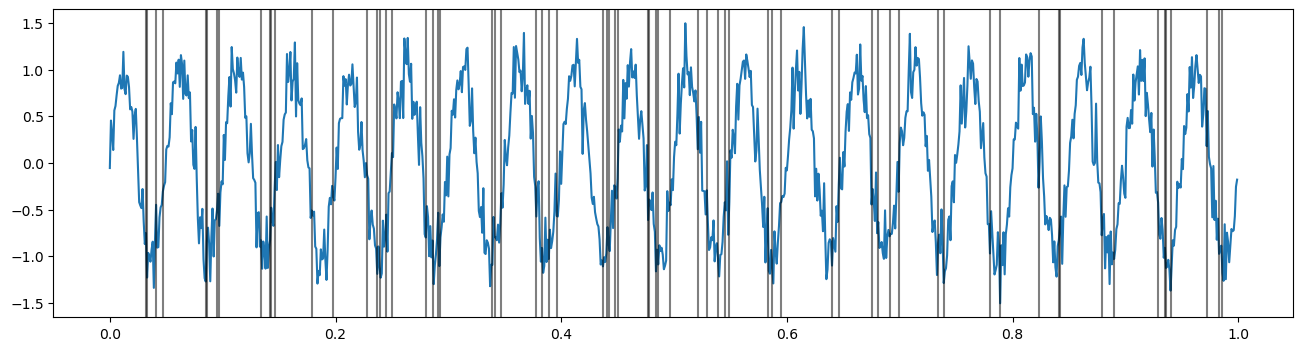

In [15]:
#Simulate LFP
fs = 1000
times = np.arange(0, 1, 1/fs)
freq = 20
lfp = np.sin(2 * np.pi * times[:] * freq)
noise = np.random.normal(0, .2, size=times.shape)
lfp += noise
plt.figure(figsize=(16, 4))
plt.plot(times, lfp)
#Simulate neuron
spike_times = []
lfp_min0 = lfp-np.min(lfp)+.001
for i in range(0,len(times)):
    probability = (2 - lfp_min0[i])/10
    if probability > 0:
        sample = np.random.choice([0,1],p=[1-probability, probability])
        if sample==1:
            spike_times.append(times[i])
for spike in spike_times:
    plt.axvline(spike, color='black', alpha=.5)

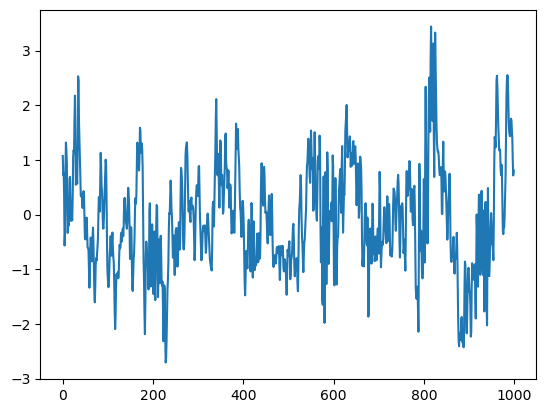

In [20]:
plt.plot(channel_map_and_all_trials_df["mPFC_trial_lfp_trace"].iloc[1][:1000])

In [24]:
channel_map_and_all_trials_df["BLA_trial_lfp_trace"].iloc[0].shape

(10000,)

In [26]:
channel_map_and_all_trials_df.columns

Index(['time', 'recording_dir', 'recording_file', 'time_stamp_index',
       'video_file', 'video_frame', 'video_number', 'subject_info',
       'competition_closeness', 'video_name', 'all_subjects',
       'current_subject', 'trial_outcome', 'lfp_index',
       'baseline_lfp_timestamp_range', 'trial_lfp_timestamp_range',
       'baseline_ephys_timestamp_range', 'trial_ephys_timestamp_range',
       'baseline_videoframe_range', 'trial_videoframe_range', 'trial_number',
       'Cohort', 'spike_interface_mPFC', 'spike_interface_vHPC',
       'spike_interface_BLA', 'spike_interface_LH', 'spike_interface_MD',
       'mPFC_baseline_lfp_trace', 'mPFC_trial_lfp_trace',
       'vHPC_baseline_lfp_trace', 'vHPC_trial_lfp_trace',
       'BLA_baseline_lfp_trace', 'BLA_trial_lfp_trace',
       'LH_baseline_lfp_trace', 'LH_trial_lfp_trace', 'MD_baseline_lfp_trace',
       'MD_trial_lfp_trace'],
      dtype='object')

In [29]:
channel_map_and_all_trials_df["time_stamp_index"]

0       1390826
1       2990825
2       4790823
3       6390821
4       7890820
         ...   
578    62088794
579    63588812
580    65588836
581    67488865
582    68488874
Name: time_stamp_index, Length: 583, dtype: int64

In [31]:
1390826//20

69541

In [35]:
lfp_index = channel_map_and_all_trials_df["lfp_index"].iloc[0]

In [38]:
np.arange(lfp_index,lfp_index+TRIAL_DURATION*LFP_SAMPLING_RATE)

array([69541, 69542, 69543, ..., 79538, 79539, 79540])

In [41]:
channel_map_and_all_trials_df["lfp_trace_trial_all_lfp_index"] = channel_map_and_all_trials_df["lfp_index"].apply(lambda x: np.arange(x,x+TRIAL_DURATION*LFP_SAMPLING_RATE))

channel_map_and_all_trials_df["lfp_trace_baseline_all_lfp_index"] = channel_map_and_all_trials_df["lfp_index"].apply(lambda x: np.arange(x-TRIAL_DURATION*LFP_SAMPLING_RATE, x))

In [95]:
channel_map_and_all_trials_df["lfp_trace_trial_all_ephys_index"] = channel_map_and_all_trials_df["time_stamp_index"].apply(lambda x: np.arange(x,x+EPHYS_SAMPLING_RATE*TRIAL_DURATION, int(EPHYS_SAMPLING_RATE/LFP_SAMPLING_RATE)))

channel_map_and_all_trials_df["lfp_trace_baseline_all_ephys_index"] = channel_map_and_all_trials_df["time_stamp_index"].apply(lambda x: np.arange(x-EPHYS_SAMPLING_RATE*TRIAL_DURATION, x, int(EPHYS_SAMPLING_RATE/LFP_SAMPLING_RATE)))

In [96]:
channel_map_and_all_trials_df["time_stamp_index"]

0       1390826
1       2990825
2       4790823
3       6390821
4       7890820
         ...   
578    62088794
579    63588812
580    65588836
581    67488865
582    68488874
Name: time_stamp_index, Length: 583, dtype: int64

In [97]:
channel_map_and_all_trials_df["time"]

0       6310663
1       7910662
2       9710660
3      11310658
4      12810657
         ...   
578    65281838
579    66781856
580    68781880
581    70681909
582    71681918
Name: time, Length: 583, dtype: int64

In [98]:
channel_map_and_all_trials_df["lfp_trace_trial_all_ephys_index"].iloc[0]

array([1390826, 1390846, 1390866, ..., 1590766, 1590786, 1590806])

In [99]:
channel_map_and_all_trials_df["lfp_trace_trial_all_lfp_index"].iloc[0]

array([69541, 69542, 69543, ..., 79538, 79539, 79540])

In [100]:
channel_map_and_all_trials_df

,time,recording_dir,recording_file,time_stamp_index,video_file,video_frame,video_number,subject_info,competition_closeness,video_name,...,LH_baseline_lfp_trace,LH_trial_lfp_trace,MD_baseline_lfp_trace,MD_trial_lfp_trace,lfp_trace_trial_all_index,lfp_trace_baseline_all_index,lfp_trace_trial_all_lfp_index,lfp_trace_baseline_all_lfp_index,lfp_trace_trial_all_ephys_index,lfp_trace_baseline_all_ephys_index
0,6310663,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,1390826,20221202_134600_omission_and_competition_subje...,1734,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[3.1382985, 3.2319791, 3.2788196, 3.2881875, 3...","[0.8118982, 1.2209699, 0.87435186, -0.4028264,...","[1.3934726, 1.494771, 1.764077, 1.828315, 1.68...","[-0.9783956, -0.86721426, -0.7288553, -1.40582...","[69541, 69542, 69543, 69544, 69545, 69546, 695...","[59541, 59542, 59543, 59544, 59545, 59546, 595...","[69541, 69542, 69543, 69544, 69545, 69546, 695...","[59541, 59542, 59543, 59544, 59545, 59546, 595...","[1390826, 1390846, 1390866, 1390886, 1390906, ...","[1190826, 1190846, 1190866, 1190886, 1190906, ..."
1,7910662,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,2990825,20221202_134600_omission_and_competition_subje...,3728,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-1.180375, -1.2959143, -1.3771042, -1.458294,...","[0.9492963, 0.46840277, 0.6713773, 0.043717593...","[-0.14577106, -0.16059524, 0.027177656, 0.1680...","[1.6281886, 1.349, 1.4675934, 0.9487473, -0.21...","[149541, 149542, 149543, 149544, 149545, 14954...","[139541, 139542, 139543, 139544, 139545, 13954...","[149541, 149542, 149543, 149544, 149545, 14954...","[139541, 139542, 139543, 139544, 139545, 13954...","[2990825, 2990845, 2990865, 2990885, 2990905, ...","[2790825, 2790845, 2790865, 2790885, 2790905, ..."
2,9710660,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,4790823,20221202_134600_omission_and_competition_subje...,5972,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-0.19985186, -0.074944444, -0.18423842, -0.13...","[-0.59643286, 0.27167362, 0.6901134, 0.4371759...","[-0.32119048, -0.52872896, -0.96851283, -0.753...","[0.096357144, 0.88450915, 1.2131118, 0.8943919...","[239541, 239542, 239543, 239544, 239545, 23954...","[229541, 229542, 229543, 229544, 229545, 22954...","[239541, 239542, 239543, 239544, 239545, 23954...","[229541, 229542, 229543, 229544, 229545, 22954...","[4790823, 4790843, 4790863, 4790883, 4790903, ...","[4590823, 4590843, 4590863, 4590883, 4590903, ..."
3,11310658,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,6390821,20221202_134600_omission_and_competition_subje...,7966,1.0,6_1_top_2_base_3,omission,20221202_134600_omission_and_competition_subje...,...,"[-2.538743, -2.1983705, -1.8673657, -1.7143542...","[2.8447661, 2.3045416, 1.5301157, 0.96490973, ...","[-2.7647088, -2.5546997, -2.3051593, -2.055619...","[2.087738, 1.7418406, 1.1266373, 0.45954946, 0...","[319541, 319542, 319543, 319544, 319545, 31954...","[309541, 309542, 309543, 309544, 309545, 30954...","[319541, 319542, 319543, 319544, 319545, 31954...","[309541, 309542, 309543, 309544, 309545, 30954...","[6390821, 6390841, 6390861, 6390881, 6390901, ...","[6190821, 6190841, 6190861, 6190881, 6190901, ..."
4,12810657,20221202_134600_omission_and_competition_subje...,20221202_134600_omission_and_competition_subje...,7890820,20221202_134600_omission_and_competition_subje...,9836,1.0,6_1_top_2_base_3,rewarded,20221202_134600_omission_and_competition_subje...,...,"[-2.1671436, -1.4832754, -1.0554676, -1.130412...","[0.5339792, 1.5113796, 0.57145137, -0.02810416...","[-2.0111465, -1.714663, -1.4255916, -1.3662949...","[0.31871977, 1.008044, 0.25942308, -0.22730403...","[394541, 394542, 39

# Reading in spike data

In [101]:
merged_spike_trial_df = pd.read_pickle("./proc/merged_spike_trial.pkl")

In [102]:
rec_file = merged_spike_trial_df["recording_file"].unique()[0]

In [103]:
channel_map_and_all_trials_df[channel_map_and_all_trials_df["recording_file"] == rec_file].iloc[0]

time                                                                            8260195
recording_dir                         20230620_114347_standard_comp_to_omission_D4_s...
recording_file                        20230620_114347_standard_comp_to_omission_D4_s...
time_stamp_index                                                                5757314
video_file                            20230620_114347_standard_comp_to_omission_D4_s...
video_frame                                                                        5755
video_number                                                                        1.0
subject_info                                                            1-1_t1b2L_box_2
competition_closeness                                                         lose_comp
video_name                            20230620_114347_standard_comp_to_omission_D4_s...
all_subjects                                                                 (1.1, 1.2)
current_subject                 

In [104]:
merged_spike_trial_df[(merged_spike_trial_df["recording_file"] == rec_file) & (merged_spike_trial_df["trial_number"] == 1)]

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin,relative_time_to_tone
0,64,5557899,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-199415
1,89,5557965,89,11,11,13,17.238409,26,0.0,520.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-199349
2,60,5558325,60,0,0,0,26.088383,5,0.0,100.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198989
3,64,5559142,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198172
4,89,5559232,89,11,11,13,17.238409,26,0.0,520.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,89,5955068,89,11,11,13,17.238409,26,0.0,520.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",98,197754
952,60,5956178,60,0,0,0,26.088383,5,0.0,100.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",99,198864
953,64,5956633,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",99,199319
954,64,5957037,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",99,199723


In [106]:
5757314/20000

287.8657

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a4490980-3f6a-4f44-80eb-ebd789a5b21f' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

In [110]:
merged_spike_trial_df[merged_spike_trial_df["trial_number"] == 1]

,spike_clusters,spike_times,cluster_id,1_5_ms_isi,1ms_isi,2ms_isi,amp,ch,channel_group,depth,...,competition_closeness,Unnamed: 13,resampled_index,all_subjects,current_subject,trial_outcome,trial_number,trial_chunked_ephys_timestamp,timestamp_bin,relative_time_to_tone
0,64,5557899,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-199415
1,89,5557965,89,11,11,13,17.238409,26,0.0,520.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-199349
2,60,5558325,60,0,0,0,26.088383,5,0.0,100.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198989
3,64,5559142,64,4,1,12,10.794415,14,0.0,280.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198172
4,89,5559232,89,11,11,13,17.238409,26,0.0,520.0,...,Subj 2 blocking Subj 1,NaN,287865,"[1.2, 1.1]",1.1,lose,1,"[5557314, 5559314, 5561314, 5563314, 5565314, ...",-100,-198082
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83174,137,5576344,137,0,0,1,14.356270,6,0.0,120.0,...,Subj 1 then Subj 2,NaN,268873,"[1.2, 1.4]",1.4,lose,1,"[5177470, 5179470, 5181470, 5183470, 5185470, ...",99,198874
83175,146,5576464,146,0,0,0,14.943707,6,0.0,120.0,...,Subj 1 then Subj 2,NaN,268873,"[1.2, 1.4]",1.4,lose,1,"[5177470, 5179470, 5181470, 5183470, 5185470, ...",99,198994
83176,187,5576807,187,0,0,1,8.631100,14,0.0,280.0,...,Subj 1 then Subj 2,NaN,268873,"[1.2, 1.4]",1.4,lose,1,"[5177470, 5179470, 5181470, 5183470, 5185470, ...",99,199337
83177,28,5576824,28,0,0,0,11.487349,12,0.0,240.0,...,Subj 1 then Subj 2,NaN,268873,"[1.2, 1.4]",1.4,lose,1,"[5177470, 5179470, 5181470, 5183470, 5185470, ...",99,199354
